In [1]:
import re
from multiprocessing import cpu_count

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

## ___GLMM___
----------------

In [ ]:
# https://medium.com/@akif.iips/understanding-random-effect-and-fixed-effect-in-statistical-analysis-db4983cdf8b1
# https://stats.oarc.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/#:~:text=Linear%20mixed%20models%20are%20an%20extension%20of,within%20classrooms%2C%20or%20patients%20from%20within%20doctors.
# https://m-clark.github.io/mixed-models-with-R/

In [ ]:
# first of all, all of thes are linear models, WE ARE ESSENTIALLY LOOKING AT COMPLEX NON-POLYNOMIAL REGRESSION!!!

In [2]:
# fixed effects - consider a group with groups within, the overarching group will have a common slope shared by all 
# the subgroups, but each subgroup will have its own intercept. This accounts for the unique group specific variations (different biases)

# random effects - using the same example, 

### ___Fixed Effects___
---------

In [ ]:
# a study tries to investigate the efficacy of two different teaching methods in student performance using school students across 
# a set of diferent schools

# the impact teaching method has on student performance is of interest to us
# but there could be other factors influencing the student performance, like there may be school specific factors - mean socioeconomic
# status of the students, mean attendence rates, gender distribution of pupil, facilities available in the school, funding that the said
# school receives to support special-ed students and whatnot

# consider the following linear equation
# score of each student - S_i
# coefficient quantifying the teaching method's influence - lambda
# teaching method - M
# intercept - c
# error term for each student - epsilon_i

## $S_i = \lambda M + c + \varepsilon_i$

In [4]:
# incorporating the school level fixed effects, say that we have 5 different schools A,B, C, D and E
# the ebove equation changes into

## $S_i = \lambda M + \alpha_1 A + \alpha_2 B + \alpha_3 C + \alpha_4 D + c + \varepsilon_i$

In [ ]:
# alpha's are the cognate quantified effects of a student belonging to a select school
# A, B, C, D and E can be understood as a binary variable, switching the correct corresponding coefficient on for each student

#### ___Random Effects___
-----------------

## ___Implementation___
-------------

In [130]:
groot = pd.read_csv(r"./GRooTFullVersion.csv", low_memory=False, encoding="latin")
colours = pd.Series(cnames.keys())

In [131]:
groot.mycorrhizalAssociationType.dropna().unique()

array(['AM', 'NM', 'EcM', 'EcM-AM', 'ErM', 'NM-AM', 'OM'], dtype=object)

In [132]:
genera, freq = np.unique(groot.genus.dropna(), return_counts=True)
# freq.max()
genera[np.argmax(freq)]

'Pinus'

In [133]:
pinus_specific_root_length = groot.query("genus == 'Pinus' & traitName == 'Specific_root_length'").\
                        loc[:, ["genus", "species", "traitName", "traitValue"]].dropna()

In [134]:
pinus_specific_root_length

,genus,species,traitName,traitValue
1160,Pinus,strobus,Specific_root_length,13.600000
1166,Pinus,strobus,Specific_root_length,4.400000
1368,Pinus,pinaster,Specific_root_length,9.907693
1372,Pinus,pinaster,Specific_root_length,6.300004
1375,Pinus,pinaster,Specific_root_length,6.138464
...,...,...,...,...
106303,Pinus,massoniana,Specific_root_length,23.928400
106310,Pinus,massoniana,Specific_root_length,30.312800
109825,Pinus,canariensis,Specific_root_length,3.070000
109827,Pinus,canariensis,Specific_root_length,2.790000


In [135]:
# we have 22 species in genus Pinus 
pinus_specific_root_length.species.unique().size

22

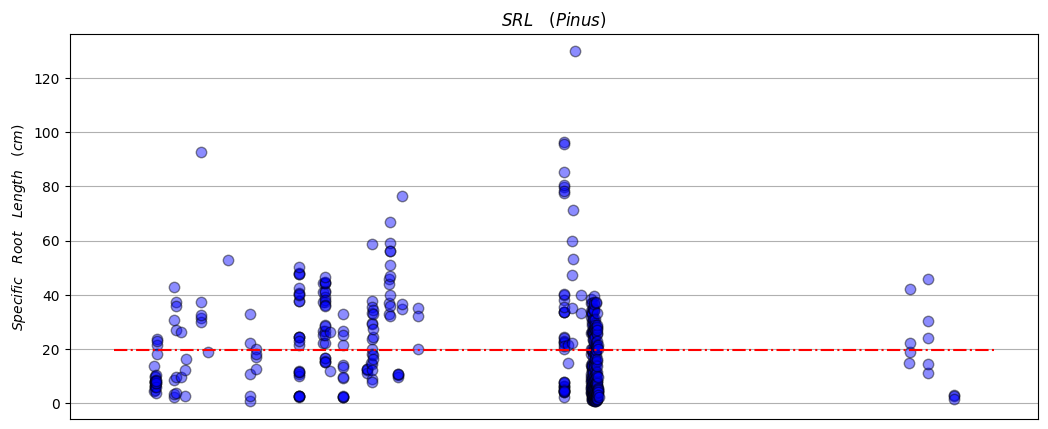

In [136]:
fig, axes = plt.subplots()
fig.set_size_inches(12.5, 5)
axes.set_axisbelow(True)
axes.plot(pinus_specific_root_length.traitValue, linestyle="none", marker="o", markerfacecolor="blue", markeredgecolor="black", markersize=7.5, alpha=0.45)
axes.hlines(y=pinus_specific_root_length.traitValue.mean(), xmin=axes.get_xlim()[0], xmax=axes.get_xlim()[1], color="red", linestyle="-.")
axes.set_xticks([])
axes.grid()
axes.set_title(r"$SRL\hspace{1}(Pinus)$")
axes.set_ylabel(r"$Specific\hspace{1}Root\hspace{1}Length\hspace{1}(cm)$")
plt.show()

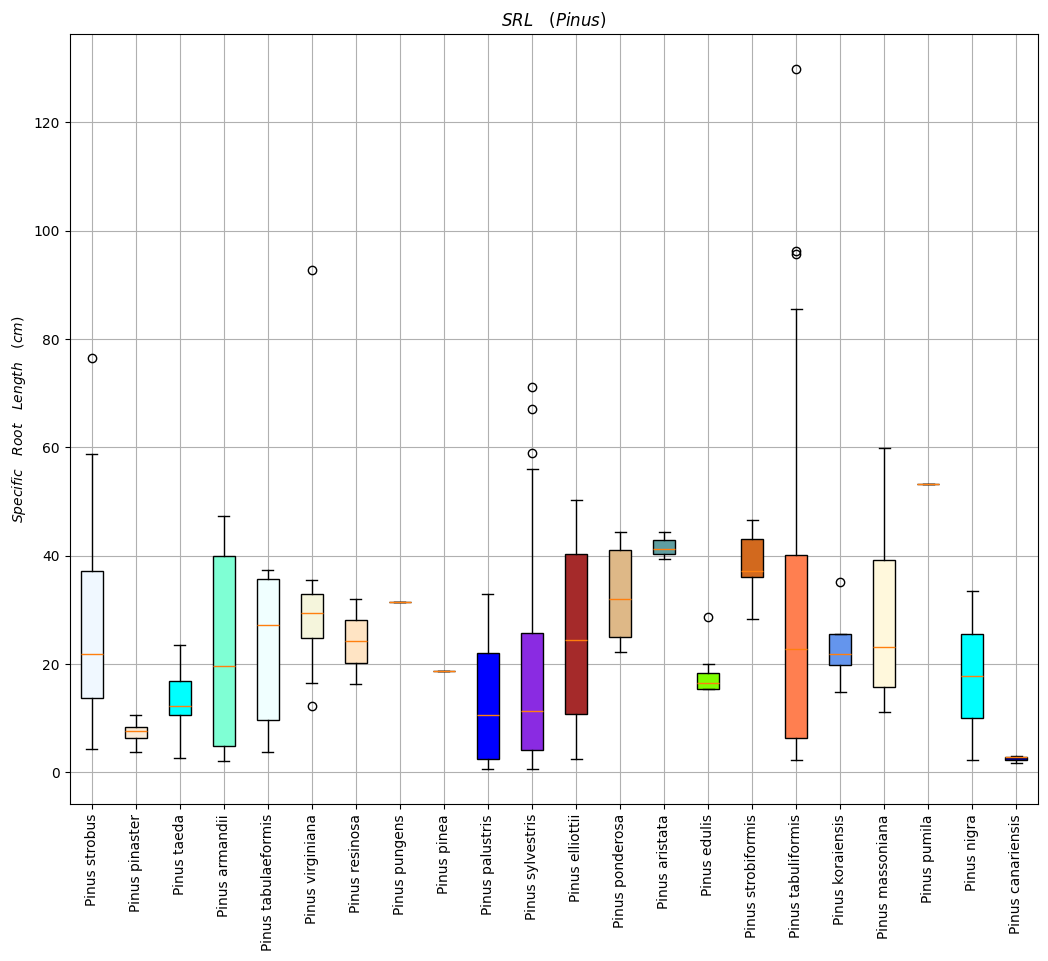

In [141]:
fig, axes = plt.subplots()
fig.set_size_inches(12.5, 10)
axes.set_axisbelow(True)

bplot= axes.boxplot([pinus_specific_root_length.loc[pinus_specific_root_length.species == sp, "traitValue"] for sp in pinus_specific_root_length.species.unique()],
            patch_artist=True)
for i, box in enumerate(bplot.get("boxes")):
    box.set_facecolor(colours[i])
axes.set_xticks(ticks=range(1, 23), labels=[f"Pinus {sp}" for sp in pinus_specific_root_length.species.unique()], rotation=90)
axes.grid()
axes.set_title(r"$SRL\hspace{1}(Pinus)$")
axes.set_ylabel(r"$Specific\hspace{1}Root\hspace{1}Length\hspace{1}(cm)$")
plt.show()

In [2]:
# FERD

fred = pd.read_csv(r"./FRED/FRED3_Entire_Database_2021.csv", low_memory=False, skiprows=range(1,10))
columns = pd.read_csv(r"./FRED/FRED3_Column_Definitions_2021.csv")

In [193]:
columns.column_id

0       F00001
1       F00002
2       F00003
3       F00004
4       F00005
         ...  
1190    F01470
1191    F01471
1192    F01472
1193    F01473
1194    F01474
Name: column_id, Length: 1195, dtype: object

In [3]:
columns = pd.Series(index=columns.column_id, data=columns.name.str.lower().str.replace(' ', '_').str.replace('+', "plus").values)
fred.rename(columns={id: name for (id, name) in zip(columns.index, columns.values)}, inplace=True, copy=True)

In [4]:
# Plant taxonomy_Family_Data source
# Plant taxonomy_Genus_Data Source
# Plant taxonomy_Species_Data source
# Plant taxonomy_Subspecies_Data source

fred.columns[fred.columns.str.contains("diam")]

Index(['root_diameter_class_lower_bound', 'root_diameter_class_upper_bound',
       'root_stele_diameter', 'n_root_stele_diameter',
       'se_root_stele_diameter', 'sd_root_stele_diameter',
       'root_stele_diameter/root_diameter_ratio',
       'n_root_stele_diameter/root_diameter_ratio',
       'se_root_stele_diameter/root_diameter_ratio', 'root_conduit_diameter',
       'n_root_conduit_diameter', 'se_root_conduit_diameter',
       'root_metaxylem_cell_wall_thickness/vessel_diameter_ratio',
       'se_root_metaxylem_cell_wall_thickness/vessel_diameter_ratio',
       'root_metaxylem_vessel_diameter', 'se_root_metaxylem_vessel_diameter',
       'root_protoxylem_cell_wall_thickness_per_protoxylem_diameter',
       'se_root_protoxylem_cell_wall_thickness_per_protoxylem_diameter',
       'root_protoxylem_diameter', 'se_root_protoxylem_diameter',
       'root_vessel_diameter', 'n_root_vessel_diameter',
       'se_root_vessel_diameter', 'root_diameter', 'n_root_diameter',
       'se_root_

In [214]:
fred.query("plant_taxonomy_genus_data_source == 'Pinus'").loc[:, ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source",
                                                                  "root_order", "root_age", "root_diameter"]].isna().mean()

plant_taxonomy_genus_data_source      0.000000
plant_taxonomy_species_data_source    0.001277
root_order                            0.749936
root_age                              0.989783
root_diameter                         0.859004
dtype: float64

In [221]:
np.unique(fred.plant_taxonomy_genus_data_source[fred.plant_taxonomy_family_data_source == "Pinaceae"].dropna(), return_counts=True)

(array(['Abies', 'Larix', 'Picea', 'Pinus', 'Tsuga'], dtype=object),
 array([  5,  33,  28, 120,   5]))

In [94]:
# is there are correlation between root order and root diamater???

subset = fred.query("plant_taxonomy_genus_data_source == 'Pinus' | plant_taxonomy_genus_data_source == 'Larix'").loc[:, ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source",
                                                                  "root_order", "root_diameter"]].dropna()

In [6]:
subset

,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source,root_order,root_diameter
109,Larix,gmelinii,1.0,0.3500
110,Larix,gmelinii,2.0,0.6800
111,Larix,gmelinii,1.0,0.3300
112,Larix,gmelinii,2.0,0.4200
113,Larix,gmelinii,3.0,0.5300
...,...,...,...,...
54986,Pinus,sylvestris,5.0,0.7774
55110,Pinus,palustris,5.0,1.5600
55111,Larix,gmelinii,5.0,1.7000
55114,Pinus,tabuliformis,5.0,1.2600


In [8]:
subset.loc[:, ["root_order","root_diameter"]].groupby("root_order").mean()

,root_diameter
root_order,
1.0,0.321936
2.0,0.374514
3.0,0.477585
4.0,0.751868
5.0,1.183542
6.0,1.035405
7.0,1.142927
8.0,1.207105
9.0,1.424675


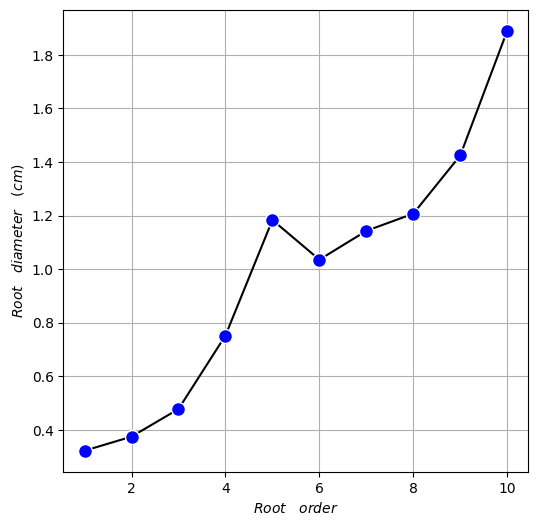

In [26]:
# irrespective of phylogenetic signals

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.plot(subset.loc[:, ["root_order","root_diameter"]].groupby("root_order").mean(), marker="o", color="black", markerfacecolor="blue",
         markeredgecolor="white", markersize=10)
axes.set_xlabel(r"$Root\hspace{1}order$")
axes.set_ylabel(r"$Root\hspace{1}diameter\hspace{1}(cm)$")
axes.grid()
plt.show()

In [27]:
subset.groupby(["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source"]).mean()

root_order  root_diameter
plant_taxonomy_genus_data_source plant_taxonomy_species_data_source                           
Larix                            gmelinii                              2.913669       0.729072
                                 kaempferi                             3.000000       0.601000
                                 principis-rupprechtii                 3.000000       0.612050
Pinus                            armandii                              2.666667       0.536519
                                 edulis                                1.000000       0.380000
                                 elliottii                             3.000000       0.607188
                                 koraiensis                            2.677419       0.848452
                                 massoniana                            1.000000       0.290900
                                 palustris                             3.333333       0.851667
                                 pumila                                1.000000       0.282300
                                 resinosa                              1.000000       0.250000
                                 strobus                               2.166667       0.628956
                                 sylvestris                            4.356557       0.708974
                                 tabulaeformis                         3.000000       0.563161
                                 tabuliformis                          3.000000       0.613562
                                 taeda                                 3.000000       0.557783
                                 virginiana                            2.357143       0.310885

In [28]:
model = LinearRegression(n_jobs=cpu_count())
model.fit(subset.root_order.to_numpy().reshape(-1, 1), subset.root_diameter)

LinearRegression(n_jobs=18)

In [29]:
model.coef_, model.intercept_

(array([0.16721871]), np.float64(0.10195304096383806))

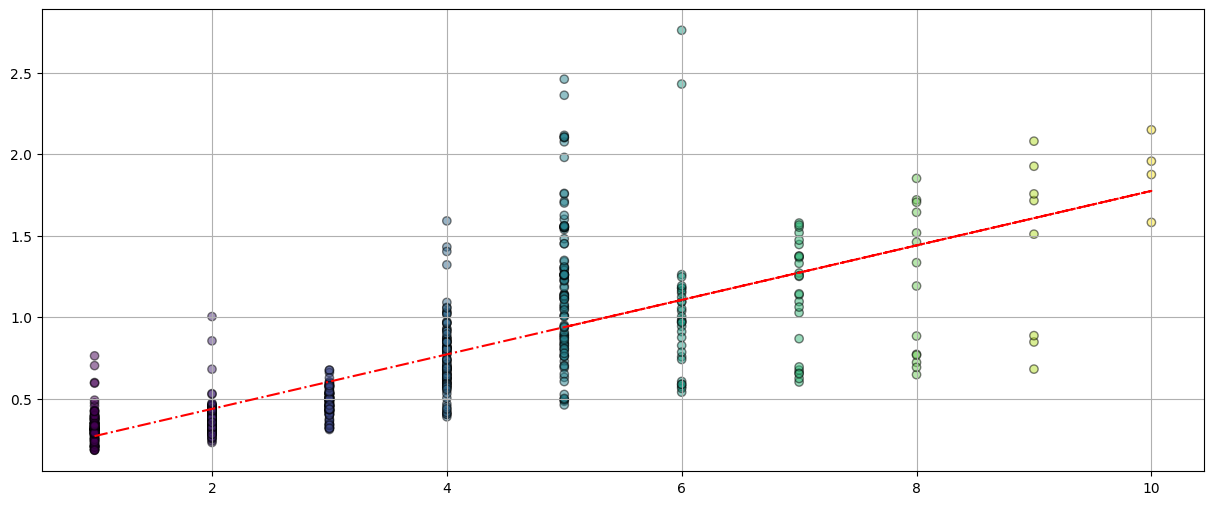

In [30]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 6)
axes.scatter(subset.root_order, subset.root_diameter, c=subset.root_order, edgecolor="black", alpha=0.5)
axes.plot(subset.root_order, subset.root_order * model.coef_ + model.intercept_, linestyle="-.", color="red")
axes.grid()
plt.show()

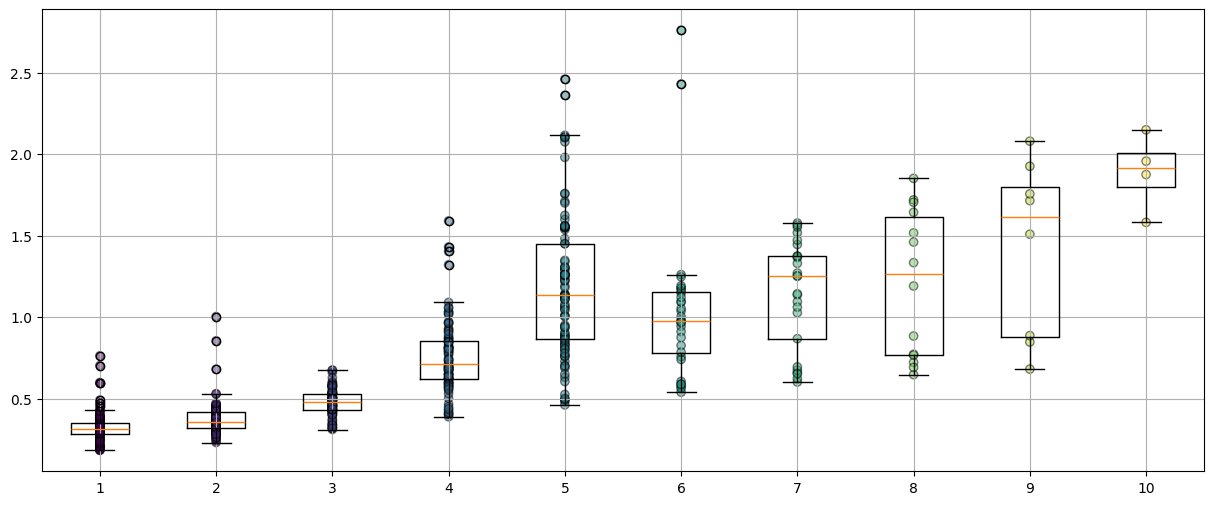

In [31]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 6)
axes.scatter(subset.root_order, subset.root_diameter, c=subset.root_order, edgecolor="black", alpha=0.5)
axes.boxplot([subset.root_diameter[subset.root_order == i] for i in range(1, 11)])
axes.grid()
plt.show()

In [34]:
# prediction accuracy

pearsonr(model.predict(subset.root_order.to_numpy().reshape(-1, 1)), subset.root_diameter)

PearsonRResult(statistic=np.float64(0.7634067412803582), pvalue=np.float64(1.6626435238682044e-121))

In [35]:
# that's quite impressive lol

In [43]:
# subset["name"] = subset.loc[:, ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source"]].apply(lambda row: ' '.join(row),
#                                                                                                                 axis=1)

In [48]:
# 17 
subset.name.unique()

array(['Larix gmelinii', 'Pinus palustris', 'Pinus tabuliformis',
       'Larix kaempferi', 'Pinus taeda', 'Larix principis-rupprechtii',
       'Pinus armandii', 'Pinus tabulaeformis', 'Pinus strobus',
       'Pinus virginiana', 'Pinus elliottii', 'Pinus koraiensis',
       'Pinus sylvestris', 'Pinus edulis', 'Pinus resinosa',
       'Pinus pumila', 'Pinus massoniana'], dtype=object)

In [58]:
pd.Series(subset.name.unique()).str.contains("Larix").sum(), pd.Series(subset.name.unique()).str.contains("Pinus").sum()

(np.int64(3), np.int64(14))

In [83]:
with pd.option_context("display.max_rows", None):
    print(fred.loc[:, ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source",
             "root_order", "root_diameter"]].dropna().groupby(["plant_taxonomy_genus_data_source",
                                                               "plant_taxonomy_species_data_source"]).count())


                                                                     root_order  root_diameter
plant_taxonomy_genus_data_source plant_taxonomy_species_data_source                           
Abelia                           biflora                                      1              1
Abies                            faxoniana                                    8              8
                                 nephrolepis                                  1              1
Acacia                           auriculiformis                              11             11
                                 crassicarpa                                  1              1
                                 mangium                                      1              1
Acer                             barbinerve                                   1              1
                                 campbellii                                   1              1
                                 caudatum         

In [95]:
# Fraxinus mandshurica 
superset = pd.concat([fred.query("plant_taxonomy_species_data_source == 'mandshurica' & plant_taxonomy_genus_data_source == 'Fraxinus'").loc[:,
        ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source", "root_order", "root_diameter"]].dropna(), subset])

In [96]:
superset

,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source,root_order,root_diameter
107,Fraxinus,mandshurica,1.0,0.3200
108,Fraxinus,mandshurica,2.0,0.5600
141,Fraxinus,mandshurica,1.0,0.2700
142,Fraxinus,mandshurica,2.0,0.3600
143,Fraxinus,mandshurica,3.0,0.4700
...,...,...,...,...
54986,Pinus,sylvestris,5.0,0.7774
55110,Pinus,palustris,5.0,1.5600
55111,Larix,gmelinii,5.0,1.7000
55114,Pinus,tabuliformis,5.0,1.2600


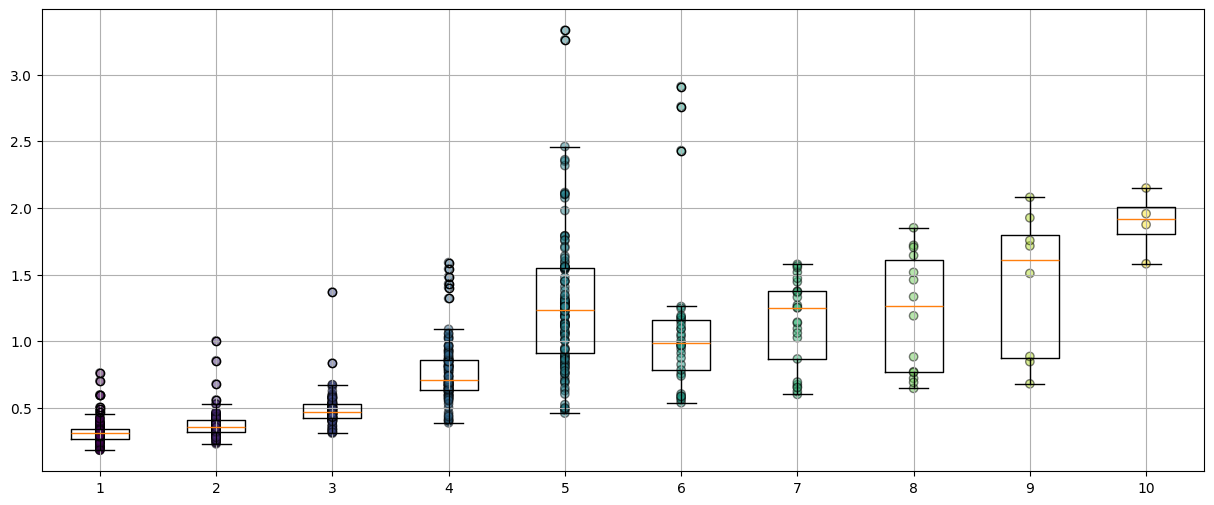

In [99]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 6)
axes.scatter(superset.root_order, superset.root_diameter, c=superset.root_order, edgecolor="black", alpha=0.5)
axes.boxplot([superset.root_diameter[superset.root_order == i] for i in range(1, 11)])
axes.grid()
plt.show()

In [100]:
# 

model = LinearRegression(n_jobs=cpu_count())
model.fit(superset.root_order.to_numpy().reshape(-1, 1), superset.root_diameter)

LinearRegression(n_jobs=18)

In [104]:
pearsonr(model.predict(superset.root_order.to_numpy().reshape(-1, 1)), superset.root_diameter)

PearsonRResult(statistic=np.float64(0.7384437822604188), pvalue=np.float64(2.4292928280472173e-131))

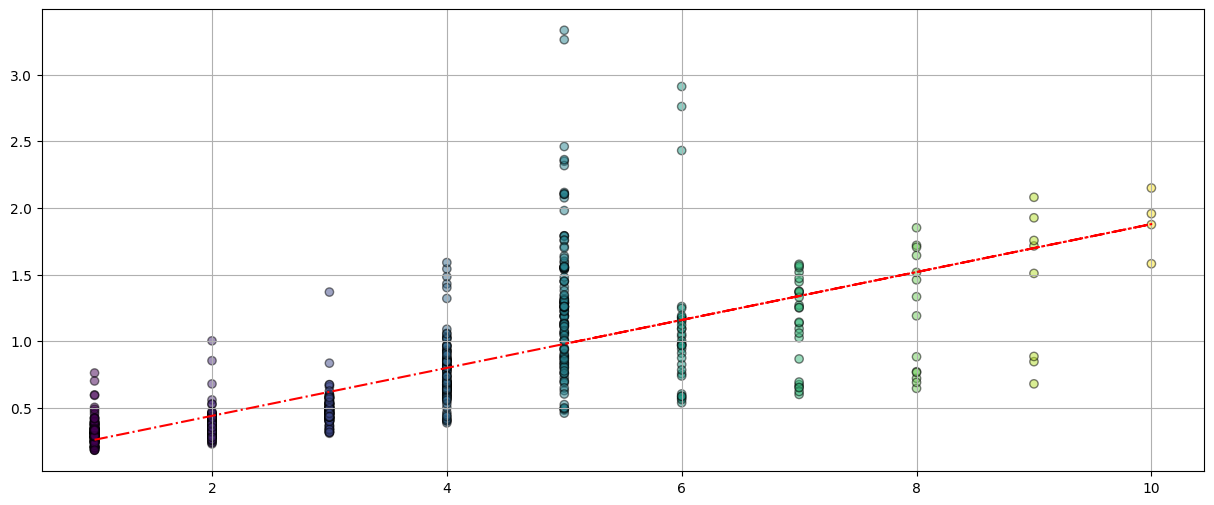

In [105]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 6)
axes.scatter(superset.root_order, superset.root_diameter, c=superset.root_order, edgecolor="black", alpha=0.5)
axes.plot(superset.root_order, superset.root_order * model.coef_ + model.intercept_, linestyle="-.", color="red")
axes.grid()
plt.show()